# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 12
* Students: Arnaud Duvieusart, Franck Dessimoz, Omar Boujdaria and Adrien Vandenbroucque
* Dataset: Flight Routes

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [2]:
# the pandas dataframe with the features and labels
features = pd.read_csv('routes.dat', header=None)

In [3]:
features.columns = ['Airline','Airline ID',
'Source airport',
'Source airport ID',
'Destination airport',
'Destination airport ID',
'Codeshare',
'Stops',
'Equipment']

In [4]:
features.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


***We can see we have \\N as nan values.***

In [5]:
len(features[features['Source airport ID'] == '\\N']) , len(features[features['Destination airport ID'] == '\\N'])

(220, 221)

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [6]:
def to_int(y):
    if y == '\\N':
        return np.nan
    else :
        return int(y)

In [7]:
# turn needed object columns to int
features['Source airport ID'] = features['Source airport ID'].apply(to_int)
features['Destination airport ID'] = features['Destination airport ID'].apply(to_int)

In [8]:
# drop nan values from both columns
features.dropna(axis=0, subset=['Source airport ID', 'Destination airport ID'], inplace=True)

In [9]:
# reset index of nodes
a = features['Source airport ID'].unique().tolist()
b = features['Destination airport ID'].unique().tolist()
nodes = list(set().union(a,b))

In [10]:
# dict from nodes to index
ID_to_nodes = {elem : i  for i,elem in enumerate(nodes) }
nodes_to_ID = {v : k for k, v in ID_to_nodes.items()}

In [11]:
features.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410,CEK,2968.0,KZN,2990.0,NaN,0,CR2
4,2B,410,CEK,2968.0,OVB,4078.0,NaN,0,CR2


In [12]:
# fill both columns with new IDs
features['Source airport ID'] = features['Source airport ID'].apply(lambda x : ID_to_nodes[x])
features['Destination airport ID'] = features['Destination airport ID'].apply(lambda x : ID_to_nodes[x])

features.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,1538,KZN,1556,NaN,0,CR2
1,2B,410,ASF,1539,KZN,1556,NaN,0,CR2
2,2B,410,ASF,1539,MRV,1535,NaN,0,CR2
3,2B,410,CEK,1541,KZN,1556,NaN,0,CR2
4,2B,410,CEK,1541,OVB,2178,NaN,0,CR2


In [13]:
#Airports are the nodes
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes))

In [14]:
for idx, row in features.iterrows():
    ra = row['Source airport ID']
    rb = row['Destination airport ID']
    i, j = ra, rb
    adjacency[i, j] = 1.0

In [15]:
adjacency.mean()

0.0033613793974154333

In [16]:
features.dtypes

Airline                   object
Airline ID                object
Source airport            object
Source airport ID          int64
Destination airport       object
Destination airport ID     int64
Codeshare                 object
Stops                      int64
Equipment                 object
dtype: object

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5,1.05,'adjacency matrix')

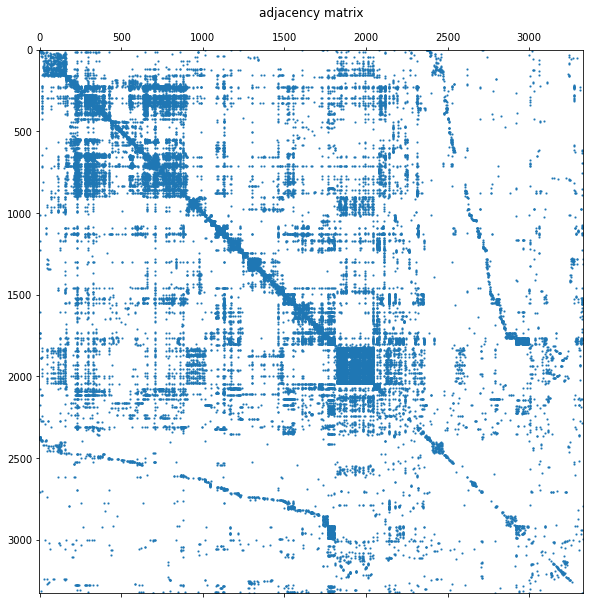

In [17]:
plt.figure(figsize=(20,10))
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [18]:
n_nodes

3330

In [19]:
L_max = n_nodes*(n_nodes-1)/2
L = np.sum(adjacency)

L, L_max, L/L_max

(37274.0, 5542785.0, 0.006724778247758122)

***We can see that the maximum number of links is very high (5.5 millions of links) where as the actual number of links in our network is much lower (37000). The network is sparse since L << L_max. ***

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

***Here the graph is directed, since a flight route has departure and destination point : one way flight.***

In [20]:
#Converting directed graph to undirected
adjacency = np.maximum(adjacency, adjacency.T)

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [21]:
np.save('adj',adjacency)
features.to_csv('Features.csv')

### Question 4

Are the edges of your graph weighted?

***No, they only represent connections. Depending on what we'll work, we may add proper weights.***

### Question 5

What is the degree distibution of your network? 

In [22]:
# Your code here. It should be a numpy array.
degree = adjacency.sum(axis=0) 

assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

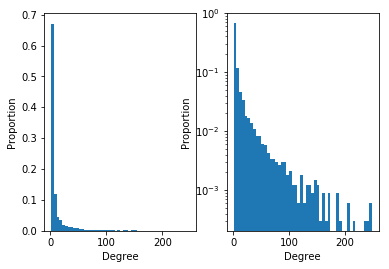

In [23]:
# weights = np.ones_like(degree) / float(n_nodes)
# plt.hist(degree, weights=weights);

weights = np.ones_like(degree) / float(n_nodes)
plt.subplot(1, 2, 1)
plt.hist(degree, weights=weights, bins = 50);
plt.xlabel('Degree')
plt.ylabel('Proportion')
plt.plot()

plt.subplot(1, 2, 2)
plt.hist(degree, weights=weights, bins = 50, log = True);
plt.xlabel('Degree')
plt.ylabel('Proportion')
plt.plot()

plt.show()

What is the average degree?

In [24]:
#average degree
degree.mean()

11.459159159159158

### Question 6

Comment on the degree distribution of your network.

**On the above histograms, we can see that more than 80% of the nodes have a degree between 0 and 10 and it decays following a power low.**

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [25]:
def dfs(graph, node, visited):
    if visited[node] == 0:
        visited[node] = 1
    for i,n in enumerate(graph[node]):
        if n==1 and visited[i]==0:
            dfs(graph,i, visited)
    return visited

In [26]:
def connected_graph(adjacency, start = 0):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """

    

    visited = np.zeros(adjacency.shape[0])
    visited = dfs(adjacency,start,visited)
    
    connected = visited.mean()==1
    
    return connected#, visited

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [27]:
connected_graph(adjacency)

False

***To justify this, we print the index of nodes that have not been visited. Yet we can check in the features to understand this data.***

In [28]:
visited = dfs(adjacency, 0, np.zeros(adjacency.shape[0]))

In [29]:
np.where(visited == 0)

(array([1043, 1044, 1045, 1046, 1047, 1048, 1049, 1962, 2029, 2515, 2517,
        2562, 2674, 2675, 2676, 2790, 2995, 2996, 3064, 3131, 3132, 3210,
        3211, 3248, 3249, 3307]),)

***We invetigate airports 2995  and 2996, respectively BLD and GCW.***

In [30]:
features[features['Source airport ID'] == 2996].append(features[features['Source airport ID'] == 2995])

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
30855,HI,16625,BLD,2996,GCW,2995,NaN,0,BH2
30856,HI,16625,GCW,2995,BLD,2996,NaN,0,BH2


***We can see that BLD is only reachable from GCW and vice-versa. By looking on a map, we see that GCW is the Grand Canyon West airport and BLD is Boulder airport.***

### Question 8

Write a function that extracts the connected components of a graph.

In [31]:
def find_components(adjacency, start = 0):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    #base case of the recursion
    if adjacency.shape == (0, 0):
        return []
    
    components = []
    
    visited = np.zeros(adjacency.shape[0])
    visited = dfs(adjacency,start,visited)
    
    visited = visited.astype(bool)
    inv_visited = np.invert(visited)
        
    new = adjacency[:,visited][visited]
    remaining = adjacency[:,inv_visited][inv_visited]
    components.append(new)

    return components + find_components(remaining)

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [32]:
connected_components = find_components(adjacency)
len_components = [len(c) for c in connected_components]

len(connected_components), max(len_components)

(7, 3304)

***The number of components is 7,  the greatest connected component has 3304 nodes (out of 3330).***

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [33]:
def minDistance(dist,queue): 
    # Initialize min value and min_index as -1 
    minimum = np.inf
    min_index = -1
      
    # from the dist array,pick one which 
    # has min value and is till in queue 
    for i in range(len(dist)): 
        if dist[i] < minimum and i in queue: 
            minimum = dist[i] 
            min_index = i 
    return min_index 

In [34]:
def ShPt(source, node, parent):
    if source == node :
        return [node]
    else:
        return ShPt(source, parent[node], parent) + [node]

In [35]:
def compute_shortest_path_lengths(graph, src):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """

    row = len(graph) 
    col = len(graph[0]) 
    
    # The output array. dist[i] will hold the shortest distance from src to i 
    # Initialize all distances as INFINITE  
    dist = [np.inf] * row 
  
    #Parent array to store shortest path tree 
    parent = [-1] * row 
  
    # Distance of source vertex from itself is always 0 
    dist[src] = 0
  
    # Add all vertices in queue 
    queue = [] 
    for i in range(row): 
        queue.append(i) 
    
          
    #Find shortest path for all vertices 
    while queue: 
  
        # Pick the minimum dist vertex from the set of vertices still in queue 
        u = minDistance(dist,queue)
  
        # if u == -1, its means we completed the current component, 
        # every other node left in queue is in other components
        if u == -1:
            break
        # remove min element   
        queue.remove(u) 
  
        # Update dist value and parent index of the adjacent vertices of 
        # the picked vertex. Consider only those vertices which are still in queue 
        for i in range(col): 
            '''Update dist[i] only if it is in queue, there is 
            an edge from u to i, and total weight of path from 
            src to i through u is smaller than current value of 
            dist[i]'''
            if graph[u][i] and i in queue:
                if dist[u] + graph[u][i] < dist[i]:
                    dist[i] = dist[u] + graph[u][i]
                    parent[i] = u
                    
    SPl = [ShPt(src, x, parent) if dist[x]!=-1 else [-1] for x in range(row) ]
    return list(zip(dist,SPl))

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [36]:
t = [True] *1000
f = [False] * (n_nodes-1000)
indexes = t+f
np.random.shuffle(indexes)

sample_adj = adjacency[:,indexes][indexes]
print(sample_adj.shape, adjacency.shape)

(1000, 1000) (3330, 3330)


In [37]:
print(connected_graph(sample_adj))

False


*** The sampled adjacency matrix will always give a fragmented graph (high number of components), and computing the shortest path to all nodes will result in a high number of "unreachable nodes". We therefor test the function on the original adjacency : *** 

In [38]:
# The first 10 nodes
compute_shortest_path_lengths(adjacency, 3)[:10]

[(1.0, [3, 0]),
 (1.0, [3, 1]),
 (1.0, [3, 2]),
 (0, [3]),
 (1.0, [3, 4]),
 (2.0, [3, 1, 5]),
 (6.0, [3, 4, 1014, 1840, 1987, 1890, 6]),
 (6.0, [3, 4, 1014, 1840, 1987, 1890, 7]),
 (7.0, [3, 4, 1014, 1840, 1987, 1890, 6, 8]),
 (6.0, [3, 4, 1014, 1840, 1987, 1890, 9])]

***The result is a list of pair (shortest path, shortest path length)***

In [39]:
def largest_comp(adjacency):
    components = find_components(adjacency)
    lengths = [len(c) for c in components]
    idx_max = lengths.index(max(lengths))
    return components[idx_max]

In [40]:
def longest_SP(adjacency,source):
    sp = compute_shortest_path_lengths(adjacency,source)
    return max(list(map(lambda x : x[0],sp)))

In [41]:
def graph_diameter(adjacency):
    l_comp = largest_comp(adjacency)
    maximum = 0

    for i in range(len(l_comp)):
        print(i, maximum)
        curr = longest_SP(l_comp,i)
        if curr > maximum :
            maximum = curr

    return maximum    

In [ ]:
graph_diameter(sample_adj)

0 0
1 8.0
2 8.0
3 8.0
4 9.0
5 9.0
6 9.0
7 9.0
8 9.0
9 9.0
10 9.0
11 9.0
12 9.0
13 9.0
14 9.0
15 9.0
16 9.0
17 9.0
18 9.0
19 9.0
20 9.0
21 9.0
22 9.0
23 9.0
24 9.0
25 9.0
26 9.0
27 9.0
28 9.0
29 9.0
30 9.0
31 9.0
32 9.0
33 9.0
34 9.0
35 9.0
36 9.0
37 9.0
38 9.0
39 9.0
40 9.0
41 9.0
42 9.0
43 9.0
44 9.0
45 9.0
46 11.0
47 11.0
48 11.0
49 11.0
50 11.0
51 11.0
52 11.0
53 11.0
54 11.0
55 11.0
56 11.0
57 11.0
58 11.0
59 11.0
60 11.0
61 11.0
62 11.0
63 11.0
64 11.0
65 11.0
66 11.0
67 11.0
68 11.0
69 11.0
70 11.0
71 11.0
72 11.0
73 11.0
74 11.0
75 11.0
76 11.0
77 11.0
78 11.0
79 11.0
80 11.0
81 11.0
82 11.0
83 11.0
84 11.0
85 11.0
86 11.0
87 11.0
88 11.0
89 11.0
90 11.0
91 11.0
92 11.0
93 11.0
94 11.0
95 11.0
96 11.0
97 11.0
98 11.0
99 11.0
100 11.0
101 11.0
102 11.0
103 11.0
104 11.0
105 11.0
106 11.0
107 11.0
108 11.0
109 11.0
110 11.0
111 11.0
112 11.0
113 11.0
114 11.0
115 11.0
116 11.0
117 11.0
118 11.0
119 11.0
120 11.0
121 11.0
122 11.0
123 11.0
124 11.0
125 11.0
126 11.0
127 11.0
128 11

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [43]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    adjacency_p = np.linalg.matrix_power(adjacency, length)
    return adjacency_p[source][target]

Test your function on 5 pairs of nodes, with different lengths.

In [44]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 23, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

0.0
0.0
0.0
0.0
453.0


### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

***It's the number of entries equal to 3 in the adjacency matrix taken to power 3.***

In [45]:
# We raise the matrix to pow 3.
Adj3 = np.linalg.matrix_power(adjacency, 3)
# An entry in this matrix represent the number of paths of length 3 between i and j,
# we sum all the entries.
Adj3.sum()

158232235.0

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [46]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    #Get the neighbors of the node
    neighbors = np.where(adjacency[node] == 1)[0]
    k_node = len(neighbors)
    if k_node == 0 or k_node == 1:
        return 0
    
    #Compute the number of links between the neighbors of the given node
    L_node = 0
    
    
    for k in neighbors:
        links = np.where(adjacency[k])[0]
        for l in links:
            if l in neighbors:
                #Add the link (divided by 2 so that we don't count twice)
                L_node += 0.5
    
    #Compute the clustering coefficient with the formula
    clustering_coefficient = (2.0 * L_node) / (k_node * (k_node - 1))
    
    return clustering_coefficient

In [47]:
compute_clustering_coefficient(adjacency, 0)

1.0

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [48]:
#Get the largest component
largest_component = connected_components[np.argmax(len_components)]

#Compute the average cluster coefficient
clustering_coeffs = [compute_clustering_coefficient(largest_component, node) for node in range(len(largest_component))]
np.mean(clustering_coeffs)

0.4938050105068712